# Rectification

In [1]:
import numpy as np

# plotting
import matplotlib.pyplot as plt
import matplotlib as mpl

import sys # system library
sys.path.append('./lib_nn') 
# my path (linux, OS)

from neural import * # import my library package

Invoking __init__.py for neural


In [2]:
def fi(x):
    return 0.2+0.8*np.sin(x)+0.5*x-3 # some function

def data(): 
    x = 7.*np.random.rand() # random x coordinate
    y = fi(x)+0.4*func.rn() # y coordinate = the function + noise from [-0.2,0.2]
    return [x,y]

In [3]:
tab=np.array([data() for i in range(200)])    # data sample
features=np.delete(tab,1,1)                   # x coordinate
labels=np.delete(tab,0,1)                     # y coordinate

In the previous chapter we have made a hump function from two sigmoids, we may now ask a question: can we make a sigmoid  as a linear combination (or simply difference) of some other functions. Then we could use these functions for activation of neurons in place of the sigmoid. The answer is yes. For instance, the **Rectified Linear Unit (ReLU)** function 

$$
{\rm ReLU}(x) = \left \{ \begin{array}{l} x {\rm ~~~ for~} x \ge 0 \\
                                          0 {\rm ~~~ for~} x < 0 \end{array}    \right . = {\rm max}(x,0)
$$

does (approximately) the job. The a bit ackward name comes from electonics, where such a unit is used to cut out the negative values of an electric signal. Rectification means "straightening up". The plot of ReLU looks as follows:   

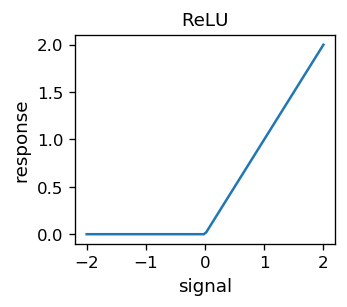

In [4]:
draw.plot(func.relu,title='ReLU');

Taking a difference of two ReLU functions with shifted arguments yield, for example, 

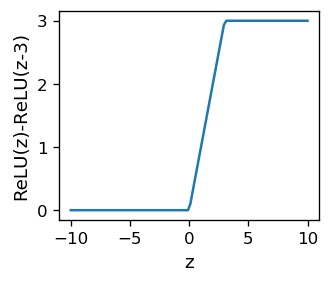

In [5]:
plt.figure(figsize=(2.8,2.3),dpi=120)

s = np.linspace(-10, 10, 100)

fs = [func.relu(z)-func.relu(z-3) for z in s]
plt.plot(s, fs)

plt.xlabel('z',fontsize=11)
plt.ylabel('ReLU(z)-ReLU(z-3)',fontsize=11);

which looks pretty much as a sigmoid, apart for the sharp corners. One can make things smooth by taking a different function, the **softplus**,

$$
{\rm softplus}(x)=\log \left( 1+e^x \right ),
$$
which looks as 

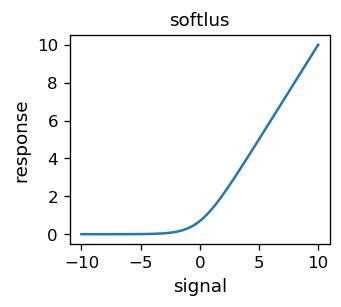

In [6]:
draw.plot(func.softplus,title='softlus',start=-10,stop=10);

A difference of two softplus functions yields a result very similar to the sigmoid. 

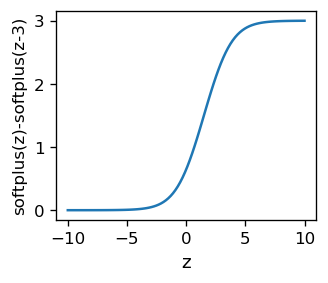

In [7]:
plt.figure(figsize=(2.8,2.3),dpi=120)

s = np.linspace(-10, 10, 100)

fs = [func.softplus(z)-func.softplus(z-3) for z in s]
plt.plot(s, fs)

plt.xlabel('z',fontsize=11)
plt.ylabel('softplus(z)-softplus(z-3)',fontsize=10);

One may then use the ReLU of softplus, or a plethora of other similar functions, for the activation. Why one should actually do this will be dicussed later. 

## Interpolation with ReLU

We will now approximate our simulated data with an ANN with ReLU acivation in the intermediate layers (and a linear function is the output layer, as above). The fuctions are taken from the module **func**.

In [8]:
fff=func.relu
dfff=func.drelu

The network must now have more neurons:

In [9]:
arch=[1,30,1]                   # architecture
weights=func.set_ran_w(arch, 5) # initialize weights randomly in [-2.5,2.5]

In [10]:
eps=0.0003          # small learning speed
for k in range(30): # rounds
    for p in range(len(features)): # loop over the data sample points
        pp=np.random.randint(len(features)) # random point
        func.back_prop_o(features,labels,pp,arch,weights,eps,
                         f=fff,df=dfff,fo=func.lin,dfo=func.dlin) # teaching

In [11]:
for k in range(600): # rounds
    eps=eps*.999
    for p in range(len(features)): # points in sequence
        func.back_prop_o(features,labels,p,arch,weights,eps,
                         f=fff,df=dfff,fo=func.lin,dfo=func.dlin) # teaching

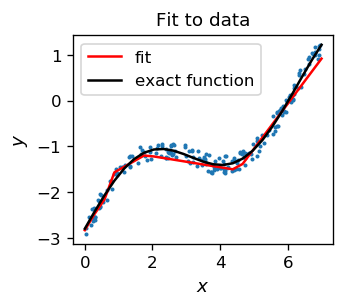

In [14]:
# draw.plot_net_w(arch,weights,.2);

coo=np.linspace(0,7,25)
exact=[fi(x) for x in coo]
res=[func.feed_forward_o(arch, weights, [x], ff=fff, ffo=func.lin)[2][0] for x in coo]

plt.figure(figsize=(2.8,2.3),dpi=120)

plt.title("Fit to data",fontsize=11) 
plt.scatter(features,labels,s=2)


plt.plot(coo,res,c='red',label='fit')
plt.plot(coo,exact,c='black',label='exact function')

plt.legend(prop={'size':10})

plt.xlabel('$x$',fontsize=11)
plt.ylabel('$y$',fontsize=11);

We note again a quite safisfactory result, noticing that the plot of the fitting function is a sequence of straight lines, simply reflecting the feature of the ReLU activation function.

##  Classifiers with rectification

There are technical reasons in favor of using [rectified functions](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) rather than sigmoid-like ones in backprop. The derivatives of sigmoid are very close to zero apart for the narrow region near the threshold. This makes updating the weights unlikely, especially when going many layers back, as the small numbers multiply (this is known as the **vanishing gradient problem**). With rectified functions, the range where the derivative is large is big (for ReLU it holds for all positive coordinates), hence the problem is cured. For that reason, rectified functions are used in deep ANNs, where there are many layers, impossible to train when the activation function is of a sigmoid type. 
Application of rectified activation functions was one of the key tricks that allowed a breakthrough in deep ANNs in 2011.

On the other hand, with ReLU it may happen that weights are set into such values that many neurons become inactive, i.e. never fire for any input, and so are effectively eliminated. This is known as the "dead neuron" probem, which arises especially when the learning speed parameter is too high. A way to reduce the problem is to use an activation function which does not have a range with zero derivative, such as the [leaky ReLU](https://en.wikipedia.org/wiki/Activation_function). Here we take it in the form 


$$
{\rm Leaky~ReLU}(x) = \left \{ \begin{array}{ll} x &{\rm ~~~ for~} x \ge 0 \\
                                          0.1 \, x &{\rm ~~~ for~} x < 0 \end{array}    \right . .
$$



Next, we repeat our example with the classification of points in the circle.

In [15]:
def cir():
    x1=np.random.random() # coordinate 1
    x2=np.random.random() # coordinate 2
    if((x1-0.5)**2+(x2-0.5)**2 < 0.4*0.4): # inside the circle of radius 0.4
                                            # centered at (0.5,0.5)
        return np.array([x1,x2,1])
    else:                                              # outside
        return np.array([x1,x2,0])


In [16]:
sample_c=np.array([cir() for _ in range(1000)]) # sample
features_c=np.delete(sample_c,2,1)
labels_c=np.delete(np.delete(sample_c,0,1),0,1)

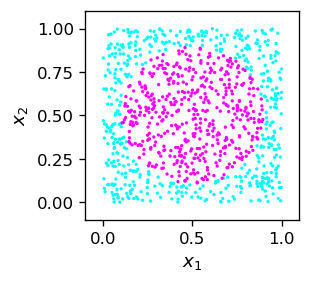

In [17]:
plt.figure(figsize=(2.3,2.3),dpi=120)
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
plt.scatter(sample_c[:,0],sample_c[:,1],c=sample_c[:,2],
            s=1,cmap=mpl.cm.cool,norm=mpl.colors.Normalize(vmin=0, vmax=.9))

plt.xlabel('$x_1$',fontsize=11)
plt.ylabel('$x_2$',fontsize=11);

We take the following architecture and initial parameters,

In [18]:
arch_c=[2,20,1]                   # architecture
weights=func.set_ran_w(arch_c,3)  # scaled random initial weights
eps=.01                           # initial learning speed 

and run the algorithm in two stages: with leaky ReLu, and then with ReLU.  

In [19]:
for k in range(300):    # rounds
    eps=.9999*eps       # decrease learning speed
    if k%100==99: print(k+1,' ',end='')             # print progress        
    for p in range(len(features_c)):                # loop over points
        func.back_prop_o(features_c,labels_c,p,arch_c,weights,eps,
            f=func.lrelu,df=func.dlrelu,fo=func.sig,dfo=func.dsig) # backprop

100  200  300  

In [20]:
for k in range(700):    # rounds
    eps=.9999*eps       # decrease learning speed
    if k%100==99: print(k+1,' ',end='')             # print progress        
    for p in range(len(features_c)):                # loop over points
        func.back_prop_o(features_c,labels_c,p,arch_c,weights,eps,
            f=func.relu,df=func.drelu,fo=func.sig,dfo=func.dsig) # backprop

100  200  300  400  500  600  700  

The result is quite satistactory, showing that the method works. With the present architecture, not surprisingly, we can notice below a polygon approxiating the cirle. 

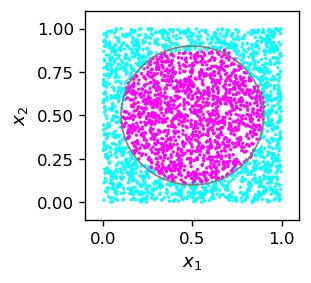

In [21]:
test=[] 

for k in range(3000):
    po=[np.random.random(),np.random.random()] 
    xt=func.feed_forward_o(arch_c,weights,po,ff=func.relu,ffo=func.sig)   
    test.append([po[0],po[1],np.round(xt[len(arch_c)-1][0],0)])

tt=np.array(test)

fig=plt.figure(figsize=(2.3,2.3),dpi=120)

# drawing the circle
ax=fig.add_subplot(1,1,1)
circ=plt.Circle((0.5,0.5), radius=.4, color='gray', fill=False)
ax.add_patch(circ)

plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
plt.scatter(tt[:,0],tt[:,1],c=tt[:,2],
            s=1,cmap=mpl.cm.cool,norm=mpl.colors.Normalize(vmin=0, vmax=.9))

plt.xlabel('$x_1$',fontsize=11)
plt.ylabel('$x_2$',fontsize=11);

## General remarks on backprop

Conclude here our discussion of the supervised learning and the back proparation, we provide a number of remarks nd hints. First, in programmers life, bulding a well-functioning ANN, even for simple problems as used for illustrations up to now, can be a frustrating eperience! ...

Initial conditions for minimization, basen of convergence, learning stategy, improvements of steepest descent ...

Professional libraries, experience verified with success ...

```{admonition} Exercises
:class: warning

1. Use various rectified activation functions for the binary classifiers and test then on various figures (in analogy to the example with the circe above).
```